In [ ]:
# ML Assignment on K-Means Clustering

# Problem Statement:
# a) Apply Data pre-processing (Label Encoding, Data Transformation ... )
# techniques if necessary.
# b) Perform data-preparation (Train-Test Split)
# c) Apply Machine Learning Algorithm
# d) Evaluate Model.
# e) Apply Cross-Validation and Evaluate Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
file = pd.read_csv("/content/Mall_Customers.csv")
file.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
file.shape

(200, 5)

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
file.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
file.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
file = file.set_index("CustomerID")
file.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
label_ecoder = preprocessing.LabelEncoder()
file['Genre'] = label_ecoder.fit_transform(file['Genre'])

In [ ]:
file.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = file.iloc[:,:4]
y = file.index

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(x,y,train_size = 0.75, random_state=123)
y_train.shape

(150,)

In [ ]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [ ]:
cluster = []
for k in range(1,11):
  kmean = KMeans(n_clusters=k).fit(file)
  cluster.append(kmean.inertia_)

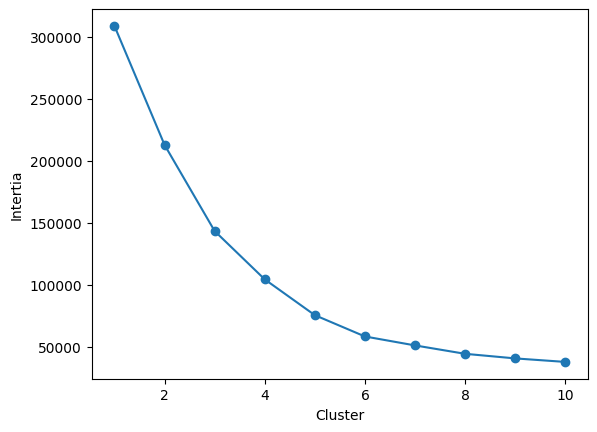

In [ ]:
plt.plot(range(1,11),cluster,marker = "o")
plt.xlabel("Cluster")
plt.ylabel("Intertia")
plt.show()


In [ ]:
km = KMeans(n_clusters=5).fit(file)
file["Labels"] = km.labels_
file.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100),Labels
CustomerID,,,,,
1,1,19,15,39,1
2,1,21,15,81,3
3,0,20,16,6,1
4,0,23,16,77,3
5,0,31,17,40,1


In [ ]:
centers = np.array(km.cluster_centers_)


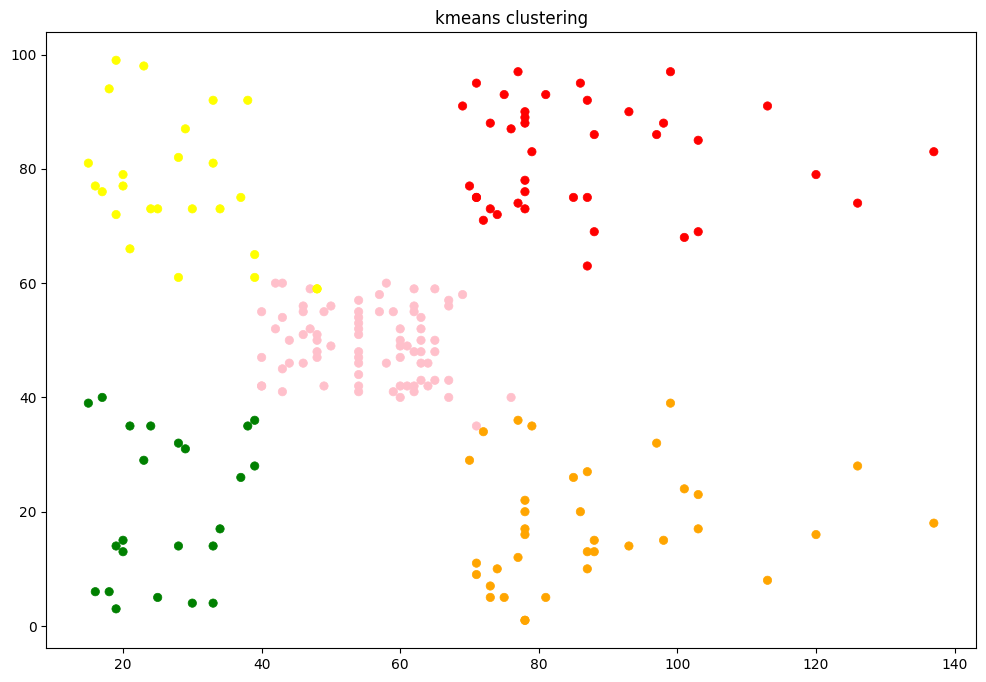

In [ ]:
colors = {0:'red',1:'green',2:'orange',3:'yellow',4:'pink'}
plt.figure(figsize=(12,8))
plt.scatter(file['Annual Income (k$)'],file['Spending Score (1-100)'],linewidths=0.5,color=file['Labels'].map(colors))
plt.title('kmeans clustering')
plt.show()

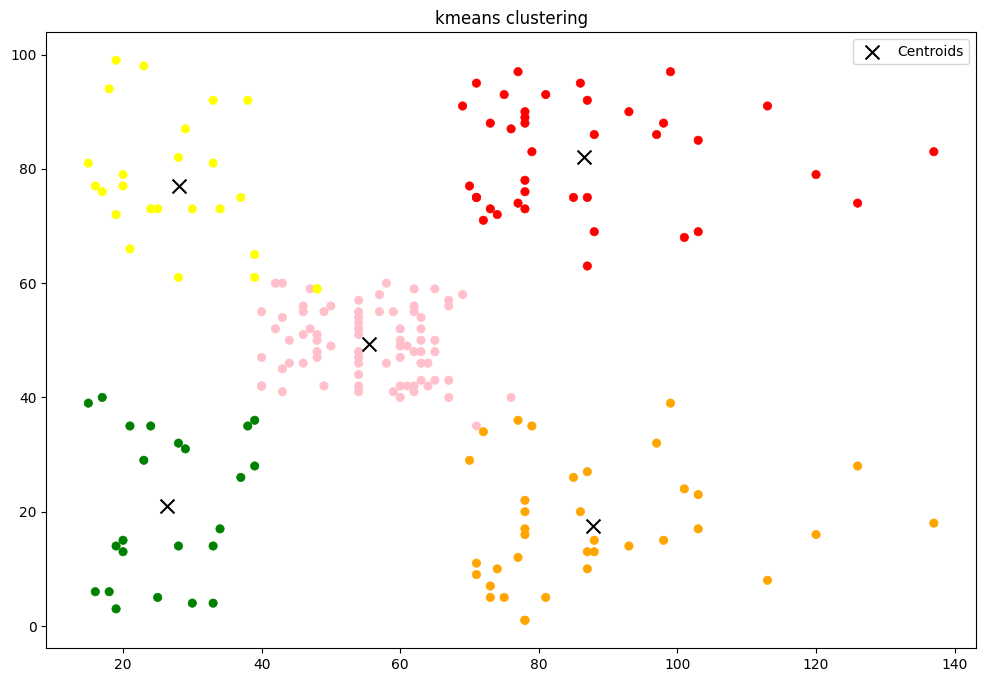

In [ ]:
colors = {0:'red',1:'green',2:'orange',3:'yellow',4:'pink'}
plt.figure(figsize=(12,8))
plt.scatter(file['Annual Income (k$)'],file['Spending Score (1-100)'],linewidths=0.5,color=file['Labels'].map(colors))
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3],s=100,c='black',label='Centroids',marker='x')
plt.title('kmeans clustering')
plt.legend()
plt.show()